In [1]:
import random, pylab

def mean(sample):
    return sum(sample)/len(sample)

class Location(object):
    def __init__(self,x,y):
        """ Assumes x, y to be floats."""
        self.x = x
        self.y = y
        
    def move(self, dX, dY):
        """ Assumes dX, dY to be floats."""
        return Location(self.x + dX, self.y + dY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getXY(self):
        return self.x, self.y
    
    def distance(self, other):
        return ((self.x-other.x)**2 + (self.y-other.y)**2)**.5
    
    def __str__(self):
        return "<" + str(self.x) + "," + str(self.y) + ">"
    
class Field(object):
    def __init__(self):
        self.drunks = {}
    
    def addDrunk(self, drunk, location):
        if drunk in self.drunks:
            raise ValueError("Duplicated drunk")
        else:
            self.drunks[drunk] = location
    
    def getLocation(self, drunk):
        if drunk not in self.drunks:
            raise ValueError("Drunk not found")
        else:
            return self.drunks[drunk]  
    
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError("Drunk not found")
        else:
            dX, dY = drunk.walk()
            currentLocation = self.drunks[drunk]
            self.drunks[drunk] = currentLocation.move(dX, dY)

class OddField(Field):
    def __init__(self, wormholes = 1000, xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for wormhole in range(wormholes):
            x = random.randint(-xRange,xRange)
            y = random.randint(-yRange,yRange)
            newX = random.randint(-xRange,xRange)
            newY = random.randint(-yRange,yRange)
            self.wormholes[x,y] = (newX,newY)
    
    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x,y = self.drunks[drunk].getXY()
        if (x,y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x,y)]

class Drunk(object):
    def __init__(self, name):
        self.name = name
        
    def __str__(self):
        return self.name + " is rather drunk."

class BasicDrunk(Drunk):
    def walk(self):
        return random.choice([(0.0,1.0),(0.0,-1.0),(1.0,0.0),(-1.0,0.0)])

class SouthDrunk(Drunk):
    def walk(self):
        return random.choice([(0.0,0.9),(0.0,-1.1),(1.0,0.0),(-1.0,0.0)])
    
def walk(field, drunk, steps):
    """ Assumes field to be a Field, drunk a Drunk, and steps int >= 0.
        Makes drunk walk steps times.
        Returns distance from start to end of the simulated walk."""
    start = field.getLocation(drunk)
    for step in range(steps):
        field.moveDrunk(drunk)
    end = field.getLocation(drunk)
    return start.distance(end), end

def simWalks(steps, trials, drunk, pr=False):
    """ Assumes steps int >=0, trials int >0, drunk a subclass of Drunk.
        Simulates #trials walks of #steps for the given Drunk.
        Returns list of final distances walked on each trial."""
    drunk = drunk("Jon")       # Initialize given Drunk, why "Jon"..?
    origin = Location(0,0)     # Start from the center
    distances = []             # List of final distancess
    locations = []             # List of final locations of drunks after their walk
    if pr:
        print(" .  .  Simulating", steps, "steps", trials, "times")
    for trial in range(trials):
        field = Field()                       # Create new Field
        field.addDrunk(drunk, origin)         # Add Drunk at the center
        distance, location = walk(field, drunk, steps)  # Simulate walk
        distances.append(round(distance, 1))  # Add walk to the list of final walked distances
        locations.append(location)            # Add current drunk location to list of final locations
    return distances, locations               # Return list of walked distances and final locations

def drunkTest(walks, trials, drunk):
    """ Assumes walks a list of ints >=0, trials int >0, drunk a subclass of Drunk.
        Runs simWalks for each given walk and prints result."""
    for steps in walks:
        distances, none = simWalks(steps, trials, drunk)
        print(drunk.__name__, "random walk of", steps, "steps")
        print(" . ", "Mean =", round(mean(distances), 4), "\n .  Max =", max(distances), "Min =", min(distances))
        
def drunkTestAll(walks, trials, drunks):
    for drunk in drunks:
        print()
        drunkTest(walks, trials, drunk)
        
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
        self.len = len(styles)

    def next(self):
        result = self.styles[self.index % self.len]
        self.index += 1
        return result
    
def simDrunk(walks, trials, drunk, pr=False):
    means, locations = [],[]
    if pr:
        print("Starting simulation of", drunk.__name__)
    for steps in walks:
        distance, location = simWalks(steps, trials, drunk, pr)
        means.append(mean(distance))
        locations.append(location)
    return means, locations
    
def testPlotAll(walks, trials, drunks):
    styles = styleIterator(["m-", "b--", "g-"])
    for drunk in drunks:
        style = styles.next()
        means, none = simDrunk(walks, trials, drunk)
        label = drunk.__name__
        pylab.plot(walks, means, style, label=label)
    pylab.title("Mean Distance from Origin (" + str(trials) + " steps)")
    pylab.xlabel("Number of steps")
    pylab.ylabel("Distance from origin")
    pylab.legend(loc="best")
    pylab.show()
    
def plotLocations(steps, trials, drunks):
    styles = styleIterator(["k+", "r^", "mo"])
    for drunk in drunks:
        none, locations = simWalks(steps, trials, drunk, True)
        xVals, yVals = [],[]
        for end in locations:
            x,y = end.getXY()
            xVals.append(x)
            yVals.append(y)
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        style = styles.next()
        label = drunk.__name__ + " mean abs distance = <" + str(meanX) + "," + str(meanY) + ">"
        pylab.plot(xVals, yVals, style, label=label)
    pylab.title("Locations at End of Walks (" + str(steps) + " steps)")
#     pylab.xlim(-1*steps/20, steps/20)
#     pylab.ylim(-1*steps/20, steps/20)
    pylab.xlabel("Steps East/West of origin")
    pylab.ylabel("Steps North/South of origin")
    pylab.legend(loc="upper left")
    pylab.show()

In [195]:
random.seed(0)
drunkTest([10,100,1000,10000], 100, BasicDrunk)

BasicDrunk random walk of 10 steps
 .  Mean = 2.863 
 .  Max = 7.2 Min = 0.0
BasicDrunk random walk of 100 steps
 .  Mean = 8.296 
 .  Max = 21.6 Min = 1.4
BasicDrunk random walk of 1000 steps
 .  Mean = 27.297 
 .  Max = 66.3 Min = 4.2
BasicDrunk random walk of 10000 steps
 .  Mean = 89.241 
 .  Max = 226.5 Min = 10.0


In [196]:
random.seed(0)
walks = [10,100,1000,10000]
trials = 100
drunks = [BasicDrunk, SouthDrunk]
drunkTestAll(walks, trials, drunks)


BasicDrunk random walk of 10 steps
 .  Mean = 2.863 
 .  Max = 7.2 Min = 0.0
BasicDrunk random walk of 100 steps
 .  Mean = 8.296 
 .  Max = 21.6 Min = 1.4
BasicDrunk random walk of 1000 steps
 .  Mean = 27.297 
 .  Max = 66.3 Min = 4.2
BasicDrunk random walk of 10000 steps
 .  Mean = 89.241 
 .  Max = 226.5 Min = 10.0

SouthDrunk random walk of 10 steps
 .  Mean = 2.677 
 .  Max = 6.3 Min = 0.2
SouthDrunk random walk of 100 steps
 .  Mean = 9.783 
 .  Max = 22.9 Min = 0.4
SouthDrunk random walk of 1000 steps
 .  Mean = 52.953 
 .  Max = 115.1 Min = 8.6
SouthDrunk random walk of 10000 steps
 .  Mean = 495.024 
 .  Max = 659.3 Min = 340.0


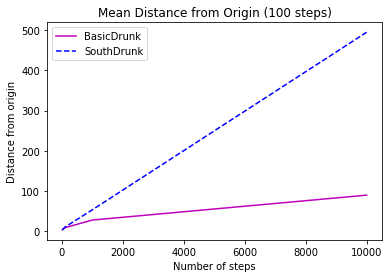

In [168]:
steps = [10,100,1000,10000]
trials = 100
drunks = [BasicDrunk, SouthDrunk]
random.seed(0)
testPlotAll(steps, trials, drunks)

 .  .  Simulating 10000 steps 1000 times
 .  .  Simulating 10000 steps 1000 times


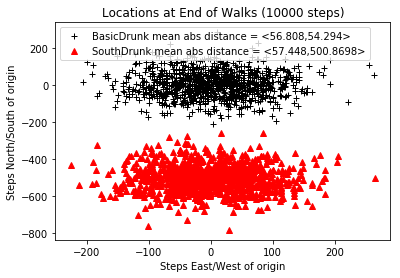

In [176]:
steps = 10000
trials = 1000
drunks = [BasicDrunk, SouthDrunk]
random.seed(0)
plotLocations(steps, trials, drunks)

In [190]:
Field.__name__
OddField.__name__

'OddField'

In [201]:
random.seed(9001)
for i in range(random.randint(1, 10)):
    print(random.randint(1, 10))

5


In [199]:
random.seed(9001)
d = random.randint(1, 10)
for i in range(random.randint(1, 10)):
    print(d)

1
1
1
1
1


In [202]:
random.seed(9001)
d = random.randint(1, 10)
for i in range(random.randint(1, 10)):
    if random.randint(1, 10) < 7:
        print(d)
    else:
        random.seed(9001)
        d = random.randint(1, 10)
        print(random.randint(1, 10))

1
1
5
1
1
